<a href="https://colab.research.google.com/github/ChriDAAI/DAAI_semantic-segmentation/blob/main/DAAI_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import shutil
shutil.rmtree('/content/DAAI_semantic-segmentation')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone "https://github.com/ChriDAAI/DAAI_semantic-segmentation.git"

Cloning into 'DAAI_semantic-segmentation'...
remote: Enumerating objects: 703, done.
remote: Counting objects: 100% (345/345), done.
remote: Compressing objects: 100% (162/162), done.
remote: Total 703 (delta 239), reused 238 (delta 182), pack-reused 358
Receiving objects: 100% (703/703), 196.81 KiB | 5.96 MiB/s, done.
Resolving deltas: 100% (416/416), done.


# Importing Dataset and Github



In [ ]:
import os
import numpy as np
import torchvision
import sys

!pip install tensorboardX

from google.colab import drive


drive.mount('/content/drive')


!git clone "https://github.com/ChriDAAI/DAAI_semantic-segmentation.git"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
fatal: destination path 'DAAI_semantic-segmentation' already exists and is not an empty directory.


# CITYSCAPE Unzip

In [ ]:
from zipfile import ZipFile
from tqdm import tqdm

# Specify the zip file name
file_name = "/content/drive/MyDrive/DAAI/Dataset/Copia di Cityscapes.zip"

# Open the zip file in read mode
with ZipFile(file_name, 'r') as zipFile:
    # Print all the filenames in the zip file
    #zipFile.printdir();
    files = zipFile.namelist()

    # Extract all the files
    print('Extracting all the files from CityScapes now...')
    for file in tqdm(files):
      zipFile.extract(member=file);
    print('Done!')

Extracting all the files from CityScapes now...


100%|██████████| 6249/6249 [01:53<00:00, 55.17it/s]

Done!


PLOT IMAGES

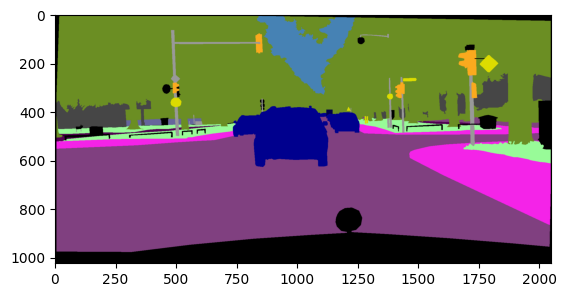

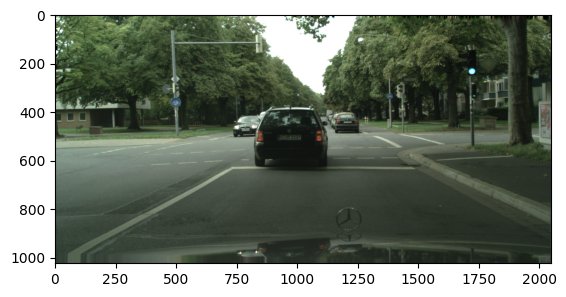

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

# Load the image
img = mpimg.imread("/content/Cityscapes/Cityspaces/gtFine/train/hanover/hanover_000000_000164_gtFine_color.png")
img2 = mpimg.imread("/content/Cityscapes/Cityspaces/images/train/hanover/hanover_000000_000164_leftImg8bit.png")
# Display the image
plt.imshow(img)
plt.show()
# Display the image
plt.imshow(img2)
plt.show()


#Cityscape Training



Since the labels with the TrainId codification are provided, in order to be able to define the CityScapes class, the important thing is to correctly define all the path to retreive the images

NUM_EPOCHS = 50
NUM_WORKERS = 2
CHECKPOINT_STEP = 50
VALIDATION_STEP = 10
SAVE_MODEL_PATH =  "/content/DAAI_semantic-segmentation/out"
PRETRAIN_MODEL = "/content/drive/MyDrive/STDCNet813M_73.91.tar"

In [ ]:
!python3 "/content/DAAI_semantic-segmentation/train.py" --num_epochs 50 --num_workers 2 --checkpoint_step 10 --validation_step 10 --save_model_path "/content/drive/MyDrive/saved_models/CityScapes" --pretrain_path "/content/drive/MyDrive/STDCNet813M_73.91.tar" --learning_rate 0.001 --batch_size 8

Training on Cityscapes Dataset
self.mode train
self.len train 1572
Testing on Cityscapes Dataset
self.mode val
self.len val 500
use pretrain model /content/drive/MyDrive/STDCNet813M_73.91.tar
epoch 0, lr 0.001000: 100% 1568/1568 [02:57<00:00,  8.84it/s, loss=1.547050]
loss for train : 2.383018
epoch 1, lr 0.000982: 100% 1568/1568 [02:48<00:00,  9.29it/s, loss=1.320072]
loss for train : 1.570880
epoch 2, lr 0.000964: 100% 1568/1568 [02:47<00:00,  9.34it/s, loss=1.186151]
loss for train : 1.352482
epoch 3, lr 0.000946: 100% 1568/1568 [02:49<00:00,  9.26it/s, loss=1.119831]
loss for train : 1.191184
epoch 4, lr 0.000928: 100% 1568/1568 [02:47<00:00,  9.36it/s, loss=0.971338]
loss for train : 1.189371
epoch 5, lr 0.000910: 100% 1568/1568 [02:48<00:00,  9.29it/s, loss=0.774584]
loss for train : 1.037880
epoch 6, lr 0.000891: 100% 1568/1568 [02:47<00:00,  9.36it/s, loss=0.732284]
loss for train : 1.065788
epoch 7, lr 0.000873: 100% 1568/1568 [02:48<00:00,  9.30it/s, loss=0.902194]
loss for t

#GTA 5 Dataset Unzip

This part is used to unzip GTA5 Dataset

In [ ]:
from zipfile import ZipFile

# Specify the zip file name
file_name = "/content/drive/MyDrive/Copia di GTA5.zip"

# Open the zip file in read mode
with ZipFile(file_name, 'r') as zipFile:
    # Print all the filenames in the zip file
    #zipFile.printdir();

    # Extract all the files
    print('Extracting all the files from GTA5 now...')
    zipFile.extractall();
    print('Done!')

Extracting all the files from GTA5 now...
Done!


This part is used to extract the TrainID images in order to avoid to perform the function that brings from label to trainID label afterwards

In [ ]:
from zipfile import ZipFile

# Specify the zip file name
file_name = "/content/drive/MyDrive/TrainID.zip"

# Open the zip file in read mode
with ZipFile(file_name, 'r') as zipFile:
    # Print all the filenames in the zip file
    #zipFile.printdir();

    # Extract all the files
    print('Extracting all the files from TrainID now...')
    zipFile.extractall();
    print('Done!')

Extracting all the files from TrainID now...
Done!


Since TrainID directory should be inside GTA5, we need to move it

In [ ]:
import shutil

source = "/content/content/GTA5/TrainID"
destination = "/content/GTA5"


print('Moving trainID directory inside GTA5 folder')
shutil.move(source, destination)
print("Done!")

Moving trainID directory inside GTA5 folder
Done!


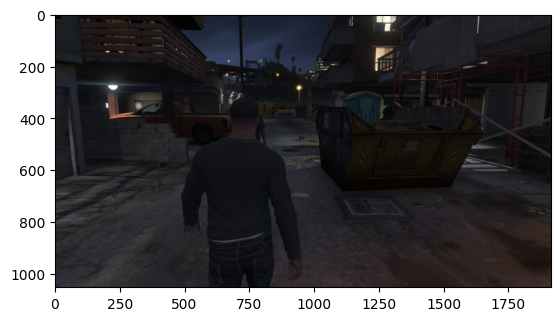

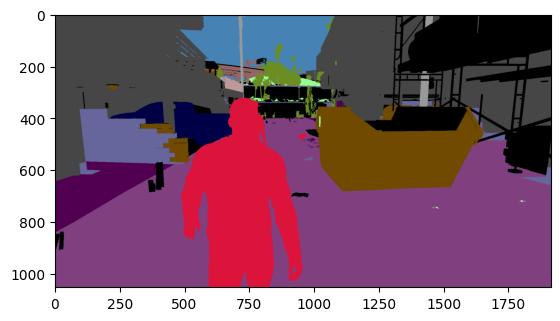

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

# Load the image
img = mpimg.imread("/content/GTA5/images/00001.png")
img2 = mpimg.imread("/content/GTA5/labels/00001.png")
img3 = mpimg.imread("/content/GTA5/TrainID/00001.png")
# Display the image
plt.imshow(img)
plt.show()
# Display the image
plt.imshow(img2)
plt.show()


# GTA 5 TRAINING

In [ ]:
!python3 "/content/DAAI_semantic-segmentation/train.py" --num_epochs 50 --num_workers 2 --checkpoint_step 10 --validation_step 10 --save_model_path "/content/drive/MyDrive/saved_models/GTA5" --pretrain_path "/content/drive/MyDrive/STDCNet813M_73.91.tar" --learning_rate 0.01 --batch_size 2 --dataset_train GTA5 --dataset_test GTA5

Training on GTA5 Dataset
Creating TRAIN_ID labels
Done
Testing on GTA5
Creating TRAIN_ID labels
Done
use pretrain model /content/drive/MyDrive/STDCNet813M_73.91.tar
epoch 0, lr 0.010000: 100% 1874/1874 [02:57<00:00, 10.56it/s, loss=2.234837]
loss for train : 3.055749
epoch 1, lr 0.009820: 100% 1874/1874 [02:54<00:00, 10.74it/s, loss=1.823127]
loss for train : 2.497234
epoch 2, lr 0.009639: 100% 1874/1874 [02:52<00:00, 10.84it/s, loss=1.709771]
loss for train : 2.310940
epoch 3, lr 0.009458: 100% 1874/1874 [02:54<00:00, 10.72it/s, loss=1.849171]
loss for train : 2.532675
epoch 4, lr 0.009277: 100% 1874/1874 [02:52<00:00, 10.86it/s, loss=1.772994]
loss for train : 2.238851
epoch 5, lr 0.009095: 100% 1874/1874 [02:53<00:00, 10.82it/s, loss=1.522430]
loss for train : 2.066650
epoch 6, lr 0.008913: 100% 1874/1874 [02:51<00:00, 10.91it/s, loss=1.538909]
loss for train : 2.196395
epoch 7, lr 0.008731: 100% 1874/1874 [02:55<00:00, 10.70it/s, loss=1.654699]
loss for train : 2.201588
epoch 8, lr

# GTA5 Training -> Cityscapes Testing

The aim of this part is to understand what is the influence of the domain shift on the model trained with GTA5 dataset. In particular, this model is tested with Cityscapes Dataset

In [ ]:
!python3 "/content/DAAI_semantic-segmentation/train.py" --num_epochs 50 --num_workers 2 --checkpoint_step 10 --validation_step 10 --save_model_path "/content/drive/MyDrive/saved_models/GTA5trainCityscapeval" --pretrain_path "/content/drive/MyDrive/STDCNet813M_73.91.tar" --learning_rate 0.001 --batch_size 8 --dataset_train GTA5 --dataset_test Cityscapes

Training on GTA5 Dataset
Creating TRAIN_ID labels
Done
Testing on Cityscapes Dataset
self.mode val
self.len val 500
use pretrain model /content/drive/MyDrive/STDCNet813M_73.91.tar
epoch 0, lr 0.001000: 100% 1872/1872 [02:58<00:00, 10.49it/s, loss=1.843971]
loss for train : 1.825882
epoch 1, lr 0.000982: 100% 1872/1872 [02:52<00:00, 10.83it/s, loss=1.333231]
loss for train : 1.163668
epoch 2, lr 0.000964: 100% 1872/1872 [02:46<00:00, 11.25it/s, loss=1.240573]
loss for train : 1.006004
epoch 3, lr 0.000946: 100% 1872/1872 [02:44<00:00, 11.35it/s, loss=1.047135]
loss for train : 0.879148
epoch 4, lr 0.000928: 100% 1872/1872 [02:43<00:00, 11.47it/s, loss=0.909900]
loss for train : 0.759669
epoch 5, lr 0.000910: 100% 1872/1872 [02:45<00:00, 11.31it/s, loss=0.954698]
loss for train : 0.823297
epoch 6, lr 0.000891: 100% 1872/1872 [02:43<00:00, 11.42it/s, loss=0.878522]
loss for train : 0.742001
epoch 7, lr 0.000873: 100% 1872/1872 [02:38<00:00, 11.83it/s, loss=0.765834]
loss for train : 0.646

# GTA 5 training -> CityScape testing with DATA AUGMENTATION




In [ ]:
!python3 "/content/DAAI_semantic-segmentation/train_data_aug.py" --num_epochs 50 --num_workers 2 --checkpoint_step 10 --validation_step 10 --save_model_path "/content/drive/MyDrive/saved_models/GTA5trainCityscapevalDA" --pretrain_path "/content/drive/MyDrive/STDCNet813M_73.91.tar" --learning_rate 0.001 --batch_size 8 --dataset_train GTA5 --dataset_test Cityscapes --data_aug True

Training on GTA5 Dataset
Creating TRAIN_ID labels
Done
Testing on Cityscapes Dataset
self.mode val
self.len val 500
use pretrain model /content/drive/MyDrive/STDCNet813M_73.91.tar
epoch 0, lr 0.001000: 100% 1872/1872 [02:57<00:00, 10.54it/s, loss=2.514336]
loss for train : 2.132266
epoch 1, lr 0.000982:  38% 720/1872 [01:06<01:37, 11.84it/s, loss=1.175288]

# Additional code

This part is used to save the folder TrainID containing all the images in gray scale(in which each pixel is associated to a ID to match the Cityscape format). This is done in order to avoid to compute them everytime

In [ ]:
!zip -r "TrainID".zip "/content/GTA5/TrainID"

  adding: content/GTA5/TrainID/ (stored 0%)
  adding: content/GTA5/TrainID/02313.png (deflated 3%)
  adding: content/GTA5/TrainID/00114.png (deflated 2%)
  adding: content/GTA5/TrainID/01358.png (deflated 3%)
  adding: content/GTA5/TrainID/00184.png (deflated 4%)
  adding: content/GTA5/TrainID/01779.png (deflated 2%)
  adding: content/GTA5/TrainID/00272.png (deflated 1%)
  adding: content/GTA5/TrainID/00157.png (deflated 3%)
  adding: content/GTA5/TrainID/01823.png (deflated 3%)
  adding: content/GTA5/TrainID/01736.png (deflated 2%)
  adding: content/GTA5/TrainID/01832.png (deflated 3%)
  adding: content/GTA5/TrainID/01141.png (deflated 4%)
  adding: content/GTA5/TrainID/00556.png (deflated 3%)
  adding: content/GTA5/TrainID/01870.png (deflated 2%)
  adding: content/GTA5/TrainID/01058.png (deflated 2%)
  adding: content/GTA5/TrainID/01762.png (deflated 1%)
  adding: content/GTA5/TrainID/01602.png (deflated 1%)
  adding: content/GTA5/TrainID/01099.png (deflated 2%)
  adding: content/GTA

In [ ]:
from google.colab import files
files.download("TrainID.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/GTA5/images/
['00001.png', '00002.png', '00003.png', '00004.png', '00005.png', '00006.png', '00007.png', '00008.png', '00009.png', '00010.png', '00011.png', '00012.png', '00013.png', '00014.png', '00015.png', '00016.png', '00017.png', '00018.png', '00019.png', '00020.png', '00021.png', '00022.png', '00023.png', '00024.png', '00025.png', '00026.png', '00027.png', '00028.png', '00029.png', '00030.png', '00031.png', '00032.png', '00033.png', '00034.png', '00035.png', '00036.png', '00037.png', '00038.png', '00039.png', '00040.png', '00041.png', '00042.png', '00043.png', '00044.png', '00045.png', '00046.png', '00047.png', '00048.png', '00049.png', '00050.png', '00051.png', '00052.png', '00053.png', '00054.png', '00055.png', '00056.png', '00057.png', '00058.png', '00059.png', '00060.png', '00061.png', '00062.png', '00063.png', '00064.png', '00065.png', '00066.png', '00067.png', '00068.png', '00069.png', '00070.png', '00071.png', '00072.png', '00073.png', '00074.png', '00075.png', '0

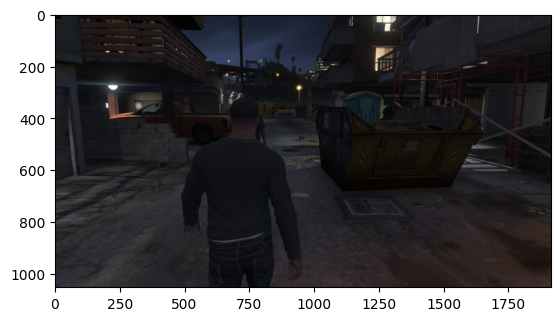

In [ ]:
import os
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

path = "/content/GTA5"

images_dir=os.path.join(path, 'images/')

print(images_dir)

images_files = sorted(os.listdir(images_dir))
print(images_files)

img_name = os.path.join(images_dir, images_files[0])
image = Image.open(img_name).convert('RGB')
plt.imshow(image)
plt.show()


In [ ]:
import pandas as pd
from PIL import Image
import numpy as np

def get_label_info_custom(csv_path):
	# return label -> {label_name: [r_value, g_value, b_value, ...}
	ann = pd.read_csv(csv_path)							#I need to read the .csv file
	label = []									#I create an empty list
	for iter, row in ann.iterrows():						#For each row of the .csv
		label_name = row['Name']						#I save the name of the category object
		r = row['R']
		g = row['G']
		b = row['B']								#I save the RGB values (the color)
		class_11 = row['ID']							#I save the TrainID (the corresponding grayscale value)
		label.append([int(r), int(g), int(b), class_11])			#I build a list with all the informations
		label_array=np.array(label)						#I convert the label into an array
	return label_array

def one_hot_it_custom(label, label_info):
	# return semantic_map -> [H, W]
	semantic_map = np.zeros(label.shape[:-1],dtype=np.uint8)					#To create a semantic map with the same dimensions of the label (HxW)
	for info in label_info:								#For each row of the .csv file
		color = info[:3]							#I exctract the color
		# colour_map = np.full((label.shape[0], label.shape[1], label.shape[2]), colour, dtype=int)
		equality = np.equal(label, color)					#I compare the color with the rgb image and I return a boolean matrix
		class_map = np.all(equality, axis=-1)					#I look just at the last axis (the color) and I save the position of only the True values inside the equality matrix
		semantic_map[class_map] = info[-1]					#Eanch of these value must be modified according to the trainID value
		#semantic_map.append(class_map)
		#semantic_map = np.stack(semantic_map, axis=-1)
	return semantic_map


label_info = get_label_info_custom("/content/DAAI_semantic-segmentation/GTA5.csv")
print(label_info)
img = Image.open("/content/GTA5/labels/00142.png", 'r')
rgb_img = img.convert('RGB')
rgb_img=np.array(rgb_img)
semantic_map = one_hot_it_custom(rgb_img,label_info)
print(semantic_map)
contains_eleven = 14 in semantic_map
print(contains_eleven)
semantic_map_img = Image.fromarray(semantic_map)
semantic_map_img.convert('L')

count = np.count_nonzero(semantic_map == 14)
print(count)

[[128  64 128   0]
 [244  35 232   1]
 [ 70  70  70   2]
 [102 102 156   3]
 [190 153 153   4]
 [153 153 153   5]
 [250 170  30   6]
 [220 220   0   7]
 [107 142  35   8]
 [152 251 152   9]
 [ 70 130 180  10]
 [220  20  60  11]
 [255   0   0  12]
 [  0   0 142  13]
 [  0   0  70  14]
 [  0  60 100  15]
 [  0  80 100  16]
 [  0   0 230  17]
 [119  11  32  18]
 [  0   0   0 255]]
[[  8   8   8 ...   8   8   8]
 [  8   8   8 ...   8   8   8]
 [  8   8   8 ...   8   8   8]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]
True
261


In [ ]:
import pandas as pd
from PIL import Image
import numpy as np

def get_label_info_custom(csv_path):
	# return label -> {label_name: [r_value, g_value, b_value, ...}
	ann = pd.read_csv(csv_path)							#I need to read the .csv file
	label = []									#I create an empty list
	for iter, row in ann.iterrows():						#For each row of the .csv
		label_name = row['Name']						#I save the name of the category object
		r = row['R']
		g = row['G']
		b = row['B']								#I save the RGB values (the color)
		class_11 = row['ID']							#I save the TrainID (the corresponding grayscale value)
		label.append([int(r), int(g), int(b), class_11])			#I build a list with all the informations
		label_array=np.array(label)						#I convert the label into an array
	return label_array

def one_hot_it_custom(label, label_info):
	# return semantic_map -> [H, W]
	semantic_map = np.zeros(label.shape[:-1],dtype=np.uint8)					#To create a semantic map with the same dimensions of the label (HxW)
	for info in label_info:								#For each row of the .csv file
		color = info[:3]							#I exctract the color
		# colour_map = np.full((label.shape[0], label.shape[1], label.shape[2]), colour, dtype=int)
		equality = np.equal(label, color)					#I compare the color with the rgb image and I return a boolean matrix
		class_map = np.all(equality, axis=-1)					#I look just at the last axis (the color) and I save the position of only the True values inside the equality matrix
		semantic_map[class_map] = info[-1]					#Eanch of these value must be modified according to the trainID value
		#semantic_map.append(class_map)
		#semantic_map = np.stack(semantic_map, axis=-1)
	return semantic_map




def from_label_to_TrainID(label_colored, label_info, path, height, width):
  index=1                                               #To count the number of images
  label_list=[]                                         #To initialize the list of the path of the TRAINID images
  if not os.path.exists("/content/GTA5/TrainID"):       #To be sure that TrainID directory is not present yet
        os.makedirs("/content/GTA5/TrainID")            #If is not present I create it
  print("Creating TRAIN_ID labels")
  for l in sorted(label_colored):
    file_path=f"/content/GTA5/TrainID/{str(index).zfill(5)}.png"              #I create a list of images according to the index
    label_list.append(f"TrainID/{str(index).zfill(5)}.png")                   #I have the relative path of the trainID images
    if not os.path.exists(file_path):
      print("Converting RGB labels into TrainID labels and saving in GTA5/TrainID")
      with open(path+l, 'rb') as f:
        img=Image.open(f)                                                      #I open the label image
        img=img.convert("RGB").resize((width, height), Image.NEAREST)          #I convert it into RGB and resize it
        img=np.array(img)                                                      # I convert into np.array
        train_id_img = one_hot_it_custom(img,label_info)                       # I obtain the semantic_map
        train_id_img = Image.fromarray(train_id_img)                           # I convert back to image
        train_id_img.convert('L').save(file_path)                              # I convert to grayscale image and i save it into trainID dir
      index=index+1
  print("Done")
  return label_list                                                            #I return the path of the trainId images

In [ ]:
import os
path = "/content/GTA5"
labels_dir_colored = os.path.join(path, 'labels/')

class gta:
    def __init__(self, path):
        self.path = "/content/GTA5"

    def img_loader(self):
        images = []
        labels = []
        domain = ["labels/", "images/"]

        for d in domain:
            for root, dirs, files in os.walk(os.path.join(self.path, d)):
                for file in files:
                    file_path = os.path.join(root, file)
                    relative_path = os.path.relpath(file_path, self.path)

                    if d == "images/":
                        images.append(relative_path)
                    else:
                        labels.append(os.path.basename(relative_path))

        # Check for equal lengths after the loop
        if len(images) != len(labels):
            raise ValueError("Mismatched number of images and labels.")

        return sorted(images), sorted(labels)

# Example usage:
mygta = gta("/content/GTA5")
image_paths, label_paths = mygta.img_loader()
print(image_paths)
img_name = os.path.join(labels_dir_colored, image_paths[1])




['images/00001.png', 'images/00002.png', 'images/00003.png', 'images/00004.png', 'images/00005.png', 'images/00006.png', 'images/00007.png', 'images/00008.png', 'images/00009.png', 'images/00010.png', 'images/00011.png', 'images/00012.png', 'images/00013.png', 'images/00014.png', 'images/00015.png', 'images/00016.png', 'images/00017.png', 'images/00018.png', 'images/00019.png', 'images/00020.png', 'images/00021.png', 'images/00022.png', 'images/00023.png', 'images/00024.png', 'images/00025.png', 'images/00026.png', 'images/00027.png', 'images/00028.png', 'images/00029.png', 'images/00030.png', 'images/00031.png', 'images/00032.png', 'images/00033.png', 'images/00034.png', 'images/00035.png', 'images/00036.png', 'images/00037.png', 'images/00038.png', 'images/00039.png', 'images/00040.png', 'images/00041.png', 'images/00042.png', 'images/00043.png', 'images/00044.png', 'images/00045.png', 'images/00046.png', 'images/00047.png', 'images/00048.png', 'images/00049.png', 'images/00050.png',

In [ ]:
!nvidia-smi --query-gpu=memory.total --format=csv

memory.total [MiB]
15360 MiB
